<a href="https://colab.research.google.com/github/marcelodepaoli/21_ANNs/blob/main/02_Classifica%C3%A7%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras TF 2.0 - Projeto de Classificação

Vamos explorar uma tarefa de classificação com a API do Keras API para TF 2.0

## Os dados

### Conjunto de dados (diagnóstico) de câncer de mama em Wisconsin
--------------------------------------------

**Características do Data Set:**

    :Número de instâncias: 569

    :Número de atributos: 30 atributos numéricos preditivos e a classe

    :Informações dos atributos:
        - radius (média das distâncias do centro aos pontos do perímetro)
        - texture (desvio padrão dos valores da escala de cinza)
        - perimeter
        - area
        - smoothness (variação local no comprimento do raio)
        - compactness (perímetro^2 / área - 1.0)
        - concavity (gravidade das porções côncavas do contorno)
        - concave points (número de porções côncavas do contorno)
        - symmetry 
        - fractal dimension ("aproximação da costa" - 1)

        A média, erro padrão e "pior" ou maior (média dos três maiores valores) desses atributos foram computados para cada imagem, resultando em 30 características. Por exemplo, o campo 3 é o raio médio, o campo
        13 é o Raio EP (SE standard error), o campo 23 é o Pior Raio.

        - classe:
                - WDBC-Malignant
                - WDBC-Benign

    :Estatísticas resumidas:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Valores de atributos ausentes: None

    :Distribuição de classes: 212 - Malignant, 357 - Benign

    :Criador:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Doador: Nick Street

    :Data: November, 1995

Esta é uma cópia do UCI ML Breast Cancer Wisconsin (Diagnostic) dataset.
https://goo.gl/U2Uwz2

As características são calculadas a partir de uma imagem digitalizada de uma fine needle aspirate (FNA) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.

O plano de separação descrito acima foi obtido usando Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], um método de classificação que usa programação linear para construir uma árvore de decisão. Características relevantes foram selecionados usando uma busca exaustiva no espaço de 1-4 características e 1-3 planos de separação.

O programa linear real usado para obter o plano de separação no espaço tridimensional é o descrito em: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

Esse banco de dados também está disponível por meio do servidor UW CS ftp:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. tópico:: Referências

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/IA/21_ANNs")
os.listdir()

Mounted at /content/drive


['california_housing_sklearn.csv',
 'project_model.h5',
 'final_project_model.h5',
 'my_gem_model.h5',
 '05-Tensorboard.ipynb',
 '.ipynb_checkpoints',
 'DATA',
 'full_data_project_model.h5',
 '03-Projeto com Keras.ipynb',
 '04-Projeto com Keras - SOLUÇÃO.ipynb',
 '02-Classificação com Keras.ipynb',
 'my_model.h5',
 '00-Noções básicas de sintaxe do Keras.ipynb',
 '01-Regressão com Keras.ipynb']

In [3]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

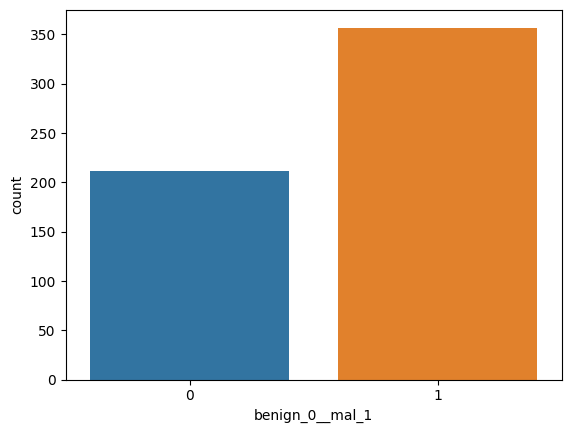

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

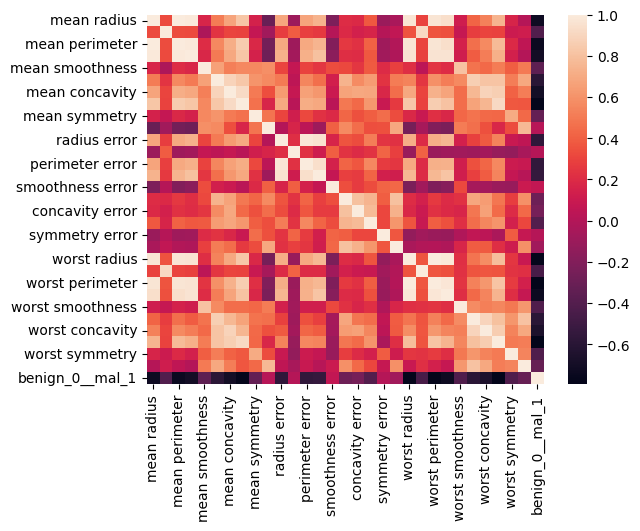

In [8]:
sns.heatmap(df.corr())

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

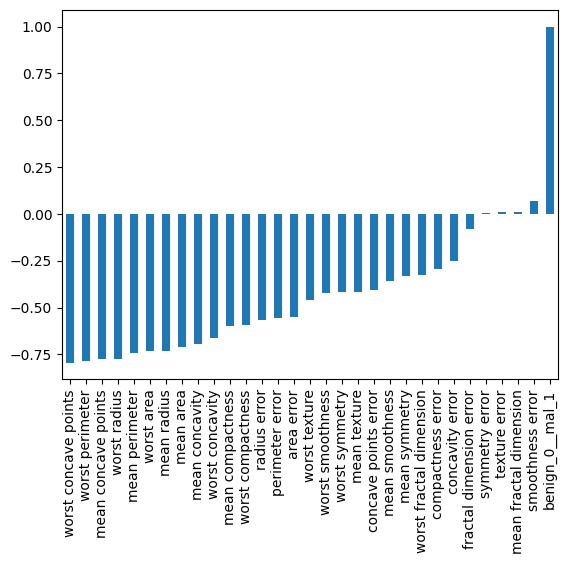

In [10]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

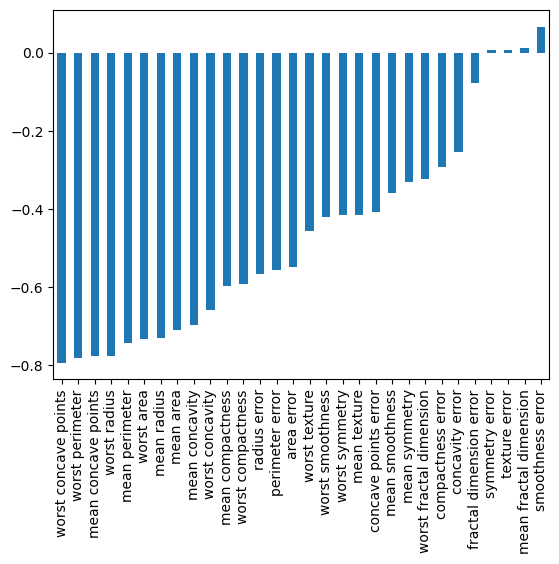

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Dimensionando os dados

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Criando o modelo

    # Para um modelo de classificação binária
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [20]:
X_train.shape

(426, 30)

In [21]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

#Para um modelo de classificação binária
model.compile(loss='binary_crossentropy', optimizer='adam')

## Treinando o Modelo 

### Exemplo Um: Escolhendo muitas épocas e overfitting!

In [22]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.7002 - val_loss: 0.6780
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6568 - val_loss: 0.6413
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6222 - val_loss: 0.6092
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5869 - val_loss: 0.5717
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5469 - val_loss: 0.5289
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5039 - val_loss: 0.4849
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4631 - val_loss: 0.4407
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4182 - val_loss: 0.3959
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3787 - val_loss: 0.3553
Epoch 10/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3419 - val_loss: 0.3173
Epoch 1

In [23]:
# model.history.history
model_loss = pd.DataFrame(model.history.history)

<Axes: >

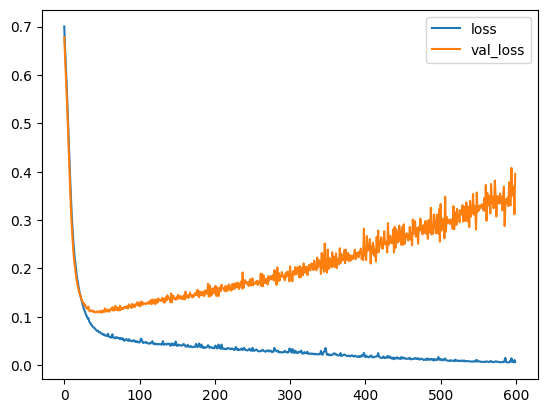

In [24]:
# model_loss
model_loss.plot()

## Exemplo Dois: Parada Antecipada

Obviamente treinamos demais! Vamos usar a parada antecipada para rastrear o val_loss e parar de treinar assim que começar a aumentar demais!

In [25]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

Pare de treinar quando uma quantidade monitorada parar de melhorar.

    Argumentos:
        monitor: Quantidade a ser monitorada.
        min_delta: Mudança mínima na quantidade monitorada para se qualificar como uma melhoria, ou seja, uma alteração absoluta menor que min_delta, não contará como melhoria.
        patience: Número de épocas sem melhora após as quais o treinamento será interrompido.
        verbose: modo verbosidade.
        mode: Um entre `{"auto", "min", "max"}`. No modo `min`, o treinamento irá parar quando a quantidade monitorada parar de diminuir; no modo `max` ele irá parar quando a quantidade monitorada parar de aumentar; no modo `auto`, a direção é inferida automaticamente a partir do nome da quantidade monitorada.

In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [28]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 3s 35ms/step - loss: 0.6968 - val_loss: 0.6741
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6474 - val_loss: 0.6311
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6060 - val_loss: 0.5881
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5577 - val_loss: 0.5310
Epoch 5/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5048 - val_loss: 0.4784
Epoch 6/600
14/14 [==============================] - 0s 18ms/step - loss: 0.4550 - val_loss: 0.4259
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4058 - val_loss: 0.3793
Epoch 8/600
14/14 [==============================] - 0s 16ms/step - loss: 0.3654 - val_loss: 0.3368
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3300 - val_loss: 0.3015
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2978 - val_loss: 0.2707
Ep

<Axes: >

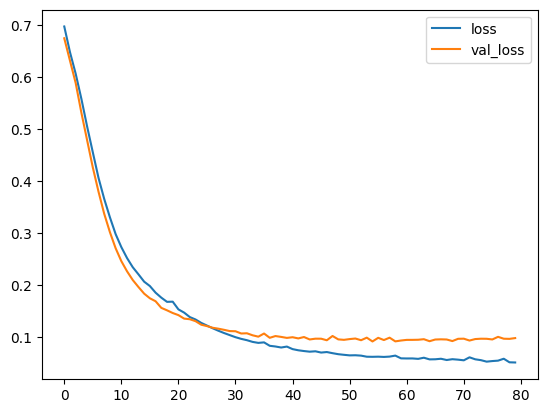

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Exemplo Três: Adicionando DropOut Layers

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7052 - val_loss: 0.6745
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6824 - val_loss: 0.6567
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6579 - val_loss: 0.6403
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6588 - val_loss: 0.6235
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6364 - val_loss: 0.6052
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6130 - val_loss: 0.5836
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6063 - val_loss: 0.5652
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.5414
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5811 - val_loss: 0.5156
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5530 - val_loss: 0.4909
Epoch 11

<Axes: >

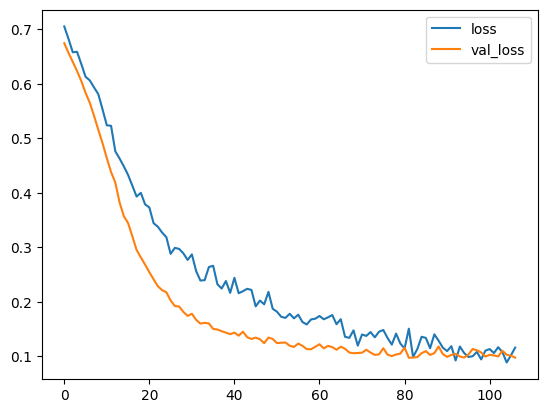

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Avaliação do modelo

In [34]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [37]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 2 86]]
